In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The Differential equations are
\begin{equation}
    \ddot{x}  = x\Omega^2 +2\dot{y}\Omega - \frac{\mu_1 (x+f)}{((x+f)^2+y^2)^{3/2}} -\frac{\mu_2 (x-(1-f))}{((x-(1-f))^2+y^2)^{3/2}}
\end{equation}

\begin{equation}
    \ddot{y} = y\Omega^2 - 2\dot{x}\Omega - \frac{\mu_1 y}{((x+f)^2+y^2)^{3/2}} -\frac{\mu_2 y}{((x-(1-f))^2+y^2)^{3/2}}
\end{equation}

In [3]:
def model_3body(z,t, Omega, mu):
    x = z[0]
    vx = z[1]
    y = z[2]
    vy = z[3]
    dxdt = vx
    dydt = vy
    dvxdt = x*Omega**2 + 2*vy*Omega - (x + mu)/((x+mu)**2+y**2)**1.5 - (mu*(x-1+mu))/((x-1+mu)**2+y**2)**1.5
    dvydt = y*Omega**2 - 2*vx*Omega - y/((x+mu)**2+y**2)**1.5 - (mu*y)/((x-1+mu)**2+y**2)**1.5
    dzdt = [dxdt, dvxdt, dydt, dvydt]
    return dzdt

def U(param, mu):
    x, y = param 
    return -1/2*(x**2+y**2) - 1/((x+mu)**2+y**2)**0.5 - mu/((x-1+mu)**2+y**2)**0.5


Example 1: a moon

-1.5249789235305329

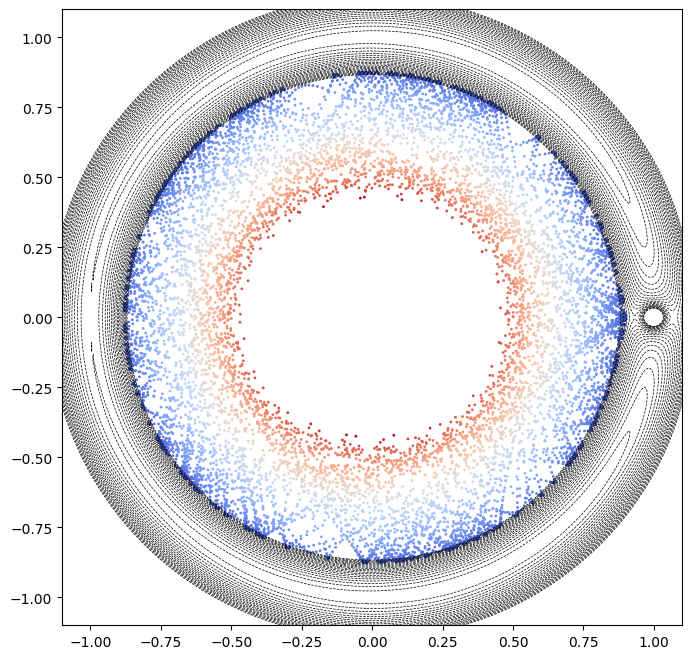

In [155]:
Nout = 10000
t = np.linspace(0, 1000, Nout+1)
Omega = 1
mu = 1e-3
z0 = [0.9, 0, 0, 0]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
result = []
NpixelX = 400
NpixelY = 400
Ext = [0.9, 1.1, -0.1, 0.1]
Ext = [-1.1, 1.1, -1.1, 1.1]
X = np.linspace(Ext[0],Ext[1],NpixelX)
Y = np.linspace(Ext[2],Ext[3],NpixelY)
parameters = [[x,y] for x in X for y in Y]
for param in parameters:
    result.append (U(param, mu))
result = np.array(result).reshape(NpixelX,NpixelY)
fig, ax = plt.subplots(1, 1, sharey=True)
ax.scatter(x, y, s =1, c = v, cmap = "coolwarm")
ax.set_xlim(Ext[0],Ext[1])
ax.set_ylim(Ext[2],Ext[3])
ax.contour(result.transpose(), np.linspace(-1.53, -1.5, 21), colors = 'k',extent=Ext, linewidths = 0.5)
fig.set_figwidth(8)
fig.set_figheight(8)
fig.savefig('innerplanet')
U((0.9,0),1e-3)





3.0254977520508546


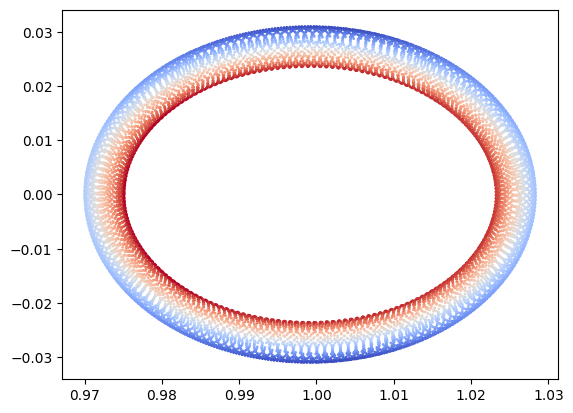

In [28]:
Nout = 10000
t = np.linspace(0, 100, Nout+1)
Omega = 1
mu = 1e-3
z0 = [0.97, 0, 0, 0.21]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
plt.scatter(x, y, s =1, c = v, cmap = "coolwarm")
U = Omega**2/2*(z0[0]**2+z0[2]**2) + 1/((z0[0]+mu)**2+z0[2]**2)**0.5 + mu/((z0[0]-1+mu)**2+z0[2]**2)**0.5
J_0 = 2*U - z0[1]**2 - z0[3]**2
print (J_0)

Example 2: A Trojan

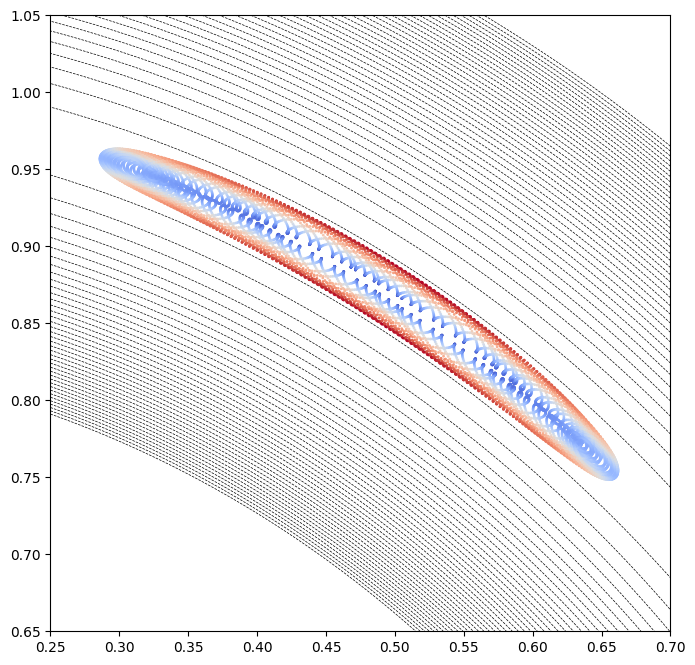

In [159]:
Nout = 10000
t = np.linspace(0, 1000, Nout+1)
Omega = 1
mu = 1e-3
z0 = [0.505, 0, np.sqrt(3)/2, 0]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
v1 = v/np.max(v)
result = []
NpixelX = 400
NpixelY = 400
Ext = [0.25, 0.7, 0.65, 1.05]
X = np.linspace(Ext[0],Ext[1],NpixelX)
Y = np.linspace(Ext[2],Ext[3],NpixelY)
parameters = [[x,y] for x in X for y in Y]
for param in parameters:
    result.append (U(param, mu))
result = np.array(result).reshape(NpixelX,NpixelY)
fig, ax = plt.subplots(1, 1, sharey=True)
ax.scatter(x, y, s =1, c = v, cmap = "coolwarm")
ax.set_xlim(Ext[0],Ext[1])
ax.set_ylim(Ext[2],Ext[3])
ax.contour(result.transpose(), np.linspace(-1.55, -1.5, 41), colors = 'k',extent=Ext, linewidths = 0.5)
fig.set_figwidth(8)
fig.set_figheight(8)
U((0.5, np.sqrt(3)/2),mu)
fig.savefig('trojan')

Example 3: A horseshoe orbit

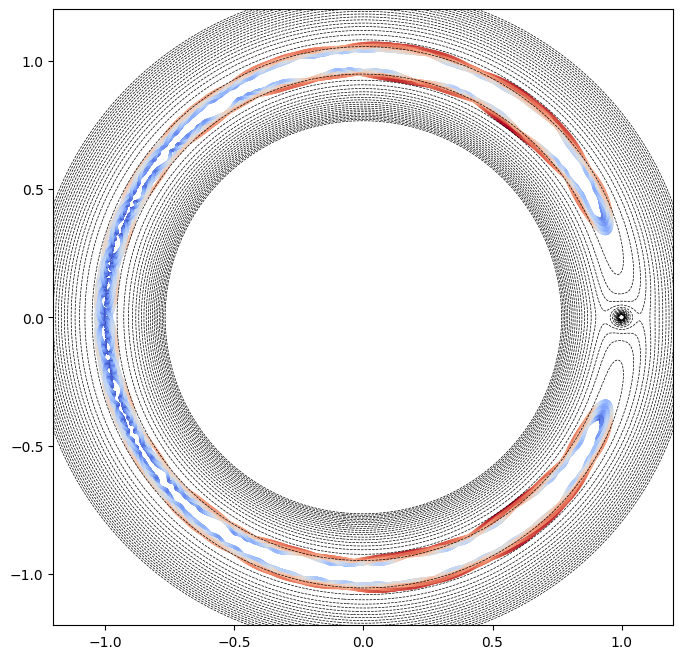

In [160]:
Nout = 100000
t = np.linspace(0, 3000, Nout+1)
Omega = 1
mu = 1e-3
z0 = [-1.0045, 0, 0, 0]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
v1 = v/np.max(v)
result = []
NpixelX = 400
NpixelY = 400
Ext = [-1.2,1.2,-1.2,1.2]
X = np.linspace(Ext[0],Ext[1],NpixelX)
Y = np.linspace(Ext[2],Ext[3],NpixelY)
parameters = [[x,y] for x in X for y in Y]
for param in parameters:
    result.append (U(param, mu))
result = np.array(result).reshape(NpixelX,NpixelY)
fig, ax = plt.subplots(1, 1, sharey=True)
ax.scatter(x, y, s =1, c = v, cmap = "coolwarm")
ax.set_xlim(Ext[0],Ext[1])
ax.set_ylim(Ext[2],Ext[3])
ax.contour(result.transpose(), np.linspace(-1.6, -1.5, 21), colors = 'k',extent=Ext, linewidths = 0.5)
fig.set_figwidth(8)
fig.set_figheight(8)
fig.savefig('horseshoe')

3.0030429176062277
0.0
0.1216636129390191


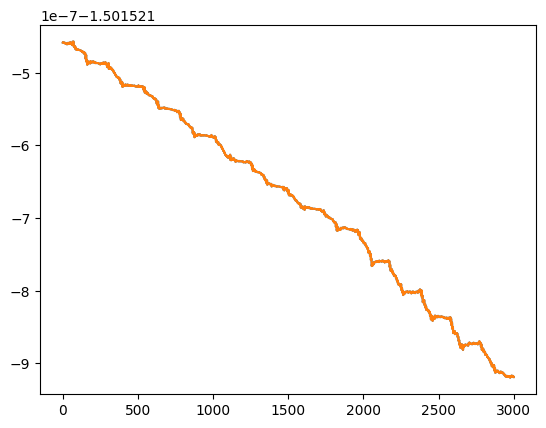

In [112]:
Nout = 100000
t = np.linspace(0, 3000, Nout+1)
Omega = 1
mu = 1e-3
z0 = [-1.0045, 0, 0, 0]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
vx = z[:,1]
y = z[:,2]
vy = z[:,3]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
v1 = v/np.max(v)
H = (v**2)/2-Omega**2*(x**2+y**2)/2 - 1/((x+mu)**2+y**2)**0.5 - mu/((x-1+mu)**2+y**2)**0.5
plt.plot(t, H)
U = Omega**2/2*(x**2+y**2) + 1/((x+mu)**2+y**2)**0.5 + mu/((x-1+mu)**2+y**2)**0.5
J = 2*U - v**2
plt.plot(t, -J/2)
print (J[0])
print(np.min(v))
print(np.max(v))

3.009739753289165
0.14993077082195555
0.18057968833578547


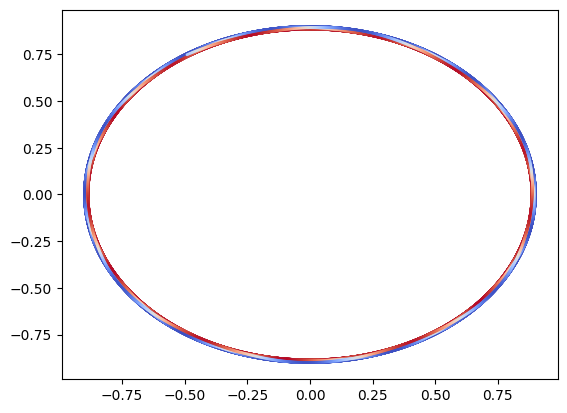

In [11]:
Nout = 100000
t = np.linspace(0, 3000, Nout+1)
Omega = 1
mu = 1e-6
z0 = [0.9, 0, 0, 0.15]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
v1 = v/np.max(v)
plt.scatter(x, y, s = 1, c = v1, cmap = "coolwarm")
U = Omega**2/2*(x**2+y**2) + 1/((x+mu)**2+y**2)**0.5 + mu/((x-1+mu)**2+y**2)**0.5
J = 2*U - v**2
print (J[0])
print(np.min(v))
print(np.max(v))

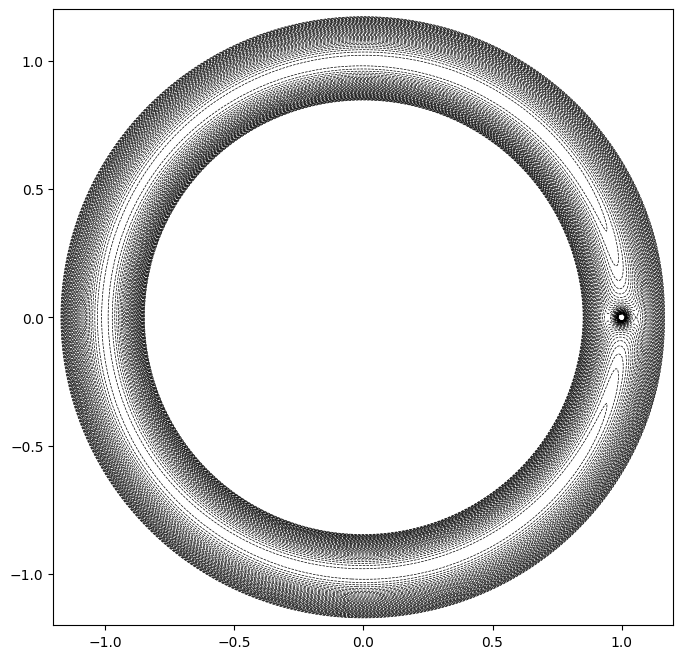

In [67]:
def U(param, mu):
    x, y = param 
    return -1/2*(x**2+y**2) - 1/((x+mu)**2+y**2)**0.5 - mu/((x-1+mu)**2+y**2)**0.5
result = []
NpixelX = 400
NpixelY = 400
border = 1.2
X = np.linspace(-border,border,NpixelX)
Y = np.linspace(-border,border,NpixelY)
parameters = [[x,y] for x in X for y in Y]
for param in parameters:
    result.append (U(param, 0.5e-3))
result = np.array(result).reshape(NpixelX,NpixelY)
fig, ax = plt.subplots(1, 1, sharey=True)
ax.contour(result.transpose(), np.linspace(-1.54, -1.5, 41), colors = 'k',extent=[-border,border,-border,border], linewidths = 0.5)
fig.set_figwidth(8)
fig.set_figheight(8)
fig.savefig("ZeroVelCurves_5e-4")

In [77]:
x = 0.5
y = np.sqrt(3)/2
U = Omega**2/2*(x**2+y**2) + 1/((x+mu)**2+y**2)**0.5 + mu/((x-1+mu)**2+y**2)**0.5
U

1.5005003753117732